<a href="https://colab.research.google.com/github/srinivas2234/Applied_AI/blob/main/BankMarketing_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Datasets/'

/content/drive/MyDrive/Datasets


In [65]:
from numpy.lib.shape_base import split
data=pd.read_csv('bank.csv',sep = ';')
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [66]:
data.shape

(4521, 17)

In [67]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [68]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [35]:
# y=data['y'].value_counts()
# no=y[0]
# yes=y[1]
# print(no,yes)


4000 521


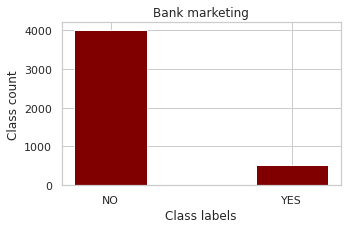

In [54]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

data = {'NO':no, 'YES':yes}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Class labels")
plt.ylabel("Class count")
plt.title("Bank marketing")
plt.show()



In [74]:
#data['y'].value_counts()
count_no_sub = len(data[data['y']=='no'])
count_sub = len(data[data['y']=='yes'])
print(count_no_sub,count_sub)
pct_of_no_sub = count_no_sub/len(data['y'])*100
pct_of_sub = count_sub/len(data['y'])*100
print("Class label percentages",pct_of_no_sub,pct_of_sub)

4000 521
Class label percentages 88.47600088476001 11.523999115239992


In [75]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [85]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


In [88]:
data.groupby('job').sum()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,18968,586380,7803,112172,1258,23897,308
blue-collar,37988,1026563,14646,263141,2693,39345,467
entrepreneur,7058,276381,2563,47960,435,5422,72
housemaid,5302,233386,1713,32775,280,2957,40
management,39284,1712154,15751,252460,2881,39698,532
retired,14230,533414,3578,65701,567,8067,136
self-employed,7586,254811,2961,48335,600,5171,108
services,16084,460350,6470,109457,1177,15167,185
student,2253,129681,1377,20890,201,3840,81


In [89]:
table=pd.crosstab(data.marital,data.y)
table

y,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167
